In [41]:
import pandas as pd
import numpy as np

col_list = ['COMPANY_FKEY','GOING_CONCERN','OPINION_TEXT1','OPINION_TEXT2','OPINION_TEXT3']
bank_data = pd.read_csv('data/Audit Analytics 01.2010.csv', usecols=col_list)
# GOING_CONCERN

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (178) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
bank_data.head()

,GOING_CONCERN,COMPANY_FKEY,OPINION_TEXT1,OPINION_TEXT2,OPINION_TEXT3
0,0.0,20.0,Report of Independent Registered Public Accoun...,NaN,NaN
1,0.0,1750.0,Report of Independent Registered Public Accoun...,NaN,NaN
2,0.0,1750.0,Report of Independent Registered Public Accoun...,NaN,NaN
3,0.0,1750.0,Report of Independent Registered Public Accoun...,NaN,NaN
4,0.0,1750.0,Report of Independent Registered Public Accoun...,NaN,NaN


In [3]:
val_counts = bank_data['GOING_CONCERN'].value_counts()
print(val_counts)

op1_nulls = bank_data['OPINION_TEXT1'].isnull().sum() # 166617 items
op2_nulls = bank_data['OPINION_TEXT2'].isnull().sum() # 15 items
op3_nulls = bank_data['OPINION_TEXT3'].isnull().sum() # 3 items
print('Op1: ', op1_nulls)
print('Op2: ', op2_nulls)
print('Op2: ', op3_nulls)


0.0    139699
1.0     26915
Name: GOING_CONCERN, dtype: int64
Op1:  0
Op2:  166602
Op2:  166614


## Remove all entries that span more than one 'OPINION TEXT'

In [40]:
# get rid of all values with op2 
df_filtered = bank_data[bank_data['OPINION_TEXT2'].isnull()]
df_filtered = df_filtered[['COMPANY_FKEY','GOING_CONCERN','OPINION_TEXT1']]

print(df_filtered)
df_filtered.head()

        COMPANY_FKEY  GOING_CONCERN  \
0               20.0            0.0   
1             1750.0            0.0   
2             1750.0            0.0   
3             1750.0            0.0   
4             1750.0            0.0   
...              ...            ...   
166612     1931055.0            0.0   
166613     1931691.0            1.0   
166614     1933359.0            1.0   
166615     1934945.0            1.0   
166616     1936214.0            0.0   

                                            OPINION_TEXT1  
0       Report of Independent Registered Public Accoun...  
1       Report of Independent Registered Public Accoun...  
2       Report of Independent Registered Public Accoun...  
3       Report of Independent Registered Public Accoun...  
4       Report of Independent Registered Public Accoun...  
...                                                   ...  
166612  Report of Independent Registered Public Accoun...  
166613  REPORT OF INDEPENDENT REGISTERED PUBLIC ACC

,COMPANY_FKEY,GOING_CONCERN,OPINION_TEXT1
0,20.0,0.0,Report of Independent Registered Public Accoun...
1,1750.0,0.0,Report of Independent Registered Public Accoun...
2,1750.0,0.0,Report of Independent Registered Public Accoun...
3,1750.0,0.0,Report of Independent Registered Public Accoun...
4,1750.0,0.0,Report of Independent Registered Public Accoun...


In [48]:
op1_nulls = df_filtered['OPINION_TEXT1'].count() # 166617 items
print(op1_nulls)

NameError: name 'df_filtered' is not defined

In [3]:
# save modified to csv
df_filtered.to_csv('./data/going_concerns.csv')

NameError: name 'df_filtered' is not defined

In [43]:
neg, pos = np.bincount(df_filtered['GOING_CONCERN'])

In [44]:
print('neg: ', neg)
print('pos: ', pos)

neg:  139687
pos:  26915


## Label Explanation
0=no 1=yes	
Indicates the auditor's opinion contains an explanatory paragraph regarding the going concern assumption.

Auditors include an explanitory paragraph when they conclude there is substantial doubt in a company as a 'going concern.'

In [60]:
import os
import random
import shutil

import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data from CSV file
data = pd.read_csv('data/going_concerns.csv')

# Shuffle data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split data into training and testing sets
train_ratio = 0.85
test_ratio = 0.15

num_samples = len(data)
train_cutoff = int(num_samples * train_ratio)
# test_cutoff = int((num_samples * test_ratio))

train_data = data.iloc[:train_cutoff]
test_data = data.iloc[train_cutoff:]
# val_data = data.iloc[test_cutoff:]

# Create output directories if they don't exist
output_dir = './data/going_concern_reports'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

train_dir = os.path.join(output_dir, 'train')
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

test_dir = os.path.join(output_dir, 'test')
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# val_dir = os.path.join(output_dir, 'val')
# if not os.path.exists(val_dir):
#     os.makedirs(val_dir)

# Convert data to the required directory structure
def convert_data(data, dirname):
    for label in [0, 1]:
        label_data = data[data['GOING_CONCERN'] == label]
        label_dir = os.path.join(dirname, str(label))
        # create directory for label if it doesn't exist
        if not os.path.exists(label_dir):
            os.makedirs(label_dir)
        
        
        # create a new text file for each report titled by company id + index
        for idx, row in label_data.iterrows():
            filename = f"{row['COMPANY_FKEY']}_{idx}.txt"
            filepath = os.path.join(label_dir, filename)

            with open(filepath, 'w', encoding='utf-8') as f:
                f.write(row['OPINION_TEXT1'])

convert_data(train_data, train_dir)
convert_data(test_data, test_dir)
# convert_data(val_data, val_dir)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evanaholevas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
len(data)
print("train: ", len(train_data))
print("test: ", len(test_data))

train:  141611
test:  24991


## Set testing, training, and validation data

In [3]:
import os
from sklearn.metrics import accuracy_score

# folder path
dir_path2 = 'data/going_concern_reports/train'
count2 = 0
for root_dir, cur_dir, files in os.walk(dir_path2):
    count2 += len(files)
print('Train count:', count2)

# folder path
dir_path = 'data/going_concern_reports/test'
count = 0
for root_dir, cur_dir, files in os.walk(dir_path):
    count += len(files)
print('test count:', count)

Train count: 141611
test count: 24992


In [23]:
import tensorflow as tf

# create validation set
batch_size = 32
seed = 43

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'data/going_concern_reports/train', 
    batch_size=batch_size, 
    validation_split=0.17, 
    subset='training', 
    seed=seed)

Found 141611 files belonging to 2 classes.
Using 117538 files for training.


In [5]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'REPORT OF INDEPENDENT REGISTERED PUBLIC ACCOUNTING FIRM        To the Board of Directors and Shareholders of  China Soar Information Technology, Inc.     Opinion on the Financial Statements     We have audited the accompanying consolidated balance sheets of China Soar Information Technology, Inc. (the Company) as of July 31, 2018 and 2017, and the related consolidated statements of operations and comprehensive loss, changes in stockholders\xe2\x80\x99 deficit, and cash flows for each of the years in the two-year period ended July 31, 2018, and the related notes (collectively referred to as the consolidated financial statements). In our opinion, the consolidated financial statements present fairly, in all material respects, the financial position of the Company as of July 31, 2018 and 2017, and the results of its operations and its cash flows for each of the years in the two-year period ended July 31, 2018, in conformity with accounting principles generally accepted in the Unit

In [6]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'data/going_concern_reports/train', 
    batch_size=batch_size, 
    validation_split=0.17,
    subset='validation', 
    seed=seed)

Found 141611 files belonging to 2 classes.
Using 24073 files for validation.


In [7]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'data/going_concern_reports/test', 
    batch_size=batch_size)

Found 24991 files belonging to 2 classes.


## Preprocess and clean text
Standardize, vectorize, and remove HTML elements.

In [8]:
import string 
import regex as re

# remove HTML tags from the text, remove punctuation, and convert to lowercase
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<p>', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [9]:
max_features = 10000
sequence_length = 250

vectorize_layer = tf.keras.layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [10]:
# convert text to numbers without labels, then adapt to the data
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [13]:
# preview the preprocessed data
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [12]:
# retrieve a batch of 32 going concern reports and labels from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'REPORT OF INDEPENDENT REGISTERED PUBLIC ACCOUNTING FIRM  To the Board of Directors and Stockholders of Technis, Inc.<p><p><p>I have audited the accompanying balance sheet of Technis, Inc. (the \xe2\x80\x9cCompany\xe2\x80\x9d), a development stage company, as of November 30, 2010 and the related statements of operations, stockholders\xe2\x80\x99 equity, and cash flows for the period from September 15, 2010 (inception) to November 30, 2010. These financial statements are the responsibility of the Company\xe2\x80\x99s management.  My responsibility is to express an opinion on these financial statements based on my audit.<p><p>  I conducted my audit in accordance with the standards of the Public Company Accounting Oversight Board (United States). Those standards require that I plan and perform the audit to obtain reasonable assurance about whether the financial statements are free of material misstatement.  An audit includes examining, on a test basis, evidence supportin

NameError: name 'vectorize_text' is not defined

In [16]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[3])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[2])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  of
 313 --->  the
Vocabulary size: 10000


In [14]:
# apply text vectorization layer

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create Neural Network
Text Classification

In [32]:
embedding_dim = 16

In [33]:
# define the model
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 16)          160016    
                                                                 
 dropout_10 (Dropout)        (None, None, 16)          0         
                                                                 
 global_average_pooling1d_5   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
________________________________________________

In [34]:
# binary cross entropy loss function for binary classification of text
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

In [35]:
# train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
3674/3674 [==============================] - 20s 5ms/step - loss: 0.2284 - binary_accuracy: 0.8960 - val_loss: 0.1419 - val_binary_accuracy: 0.9388
Epoch 2/10
3674/3674 [==============================] - 18s 5ms/step - loss: 0.1318 - binary_accuracy: 0.9433 - val_loss: 0.1222 - val_binary_accuracy: 0.9510
Epoch 3/10
3674/3674 [==============================] - 18s 5ms/step - loss: 0.1187 - binary_accuracy: 0.9509 - val_loss: 0.1147 - val_binary_accuracy: 0.9548
Epoch 4/10
3674/3674 [==============================] - 18s 5ms/step - loss: 0.1126 - binary_accuracy: 0.9546 - val_loss: 0.1108 - val_binary_accuracy: 0.9568
Epoch 5/10
3674/3674 [==============================] - 18s 5ms/step - loss: 0.1087 - binary_accuracy: 0.9560 - val_loss: 0.1085 - val_binary_accuracy: 0.9583
Epoch 6/10
3674/3674 [==============================] - 18s 5ms/step - loss: 0.1052 - binary_accuracy: 0.9577 - val_loss: 0.1067 - val_binary_accuracy: 0.9597
Epoch 7/10
3674/3674 [========================

## Evaluate the Model

In [36]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

781/781 [==============================] - 3s 4ms/step - loss: 0.1050 - binary_accuracy: 0.9566
Loss:  0.10498160123825073
Accuracy:  0.9565843939781189


## Plot accuracy and loss over time

In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

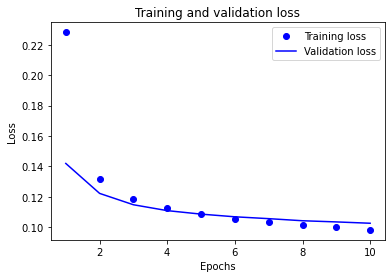

In [38]:
import matplotlib.pyplot as plt

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

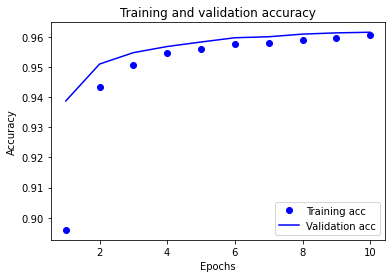

In [39]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

## Export Model
Include text vectorization inside of the model as a layer

In [40]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  tf.keras.layers.Activation('sigmoid')
])

export_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

model_dir = 'trained_models/going_concern_sentiment_model'
tf.saved_model.save(export_model, model_dir)

# Testing with the raw input `raw_test_ds`
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

INFO:tensorflow:Assets written to: trained_models/going_concern_sentiment_model/assets


INFO:tensorflow:Assets written to: trained_models/going_concern_sentiment_model/assets


781/781 [==============================] - 5s 6ms/step - loss: 0.1050 - accuracy: 0.9591
0.9591453075408936


In [53]:
# grab the unseen data from the set (Reports that spanned more than one OPINION_TEXT)
# select where the OPINION_TEXT2 is not null

df_unseen = bank_data[bank_data['OPINION_TEXT2'].notnull()]

# create a new text file that combines the OPINION_TEXT columns
# Convert data to the required directory structure
def convert_unseen(data, dirname):
    
    for label in [0, 1]:
        label_data = data[data['GOING_CONCERN'] == label]
        label_dir = os.path.join(dirname, str(label))
        # create directory for label if it doesn't exist
        if not os.path.exists(label_dir):
            os.makedirs(label_dir)
        
        
        # create a new text file for each report titled by company id + index
        for idx, row in label_data.iterrows():
            temp_data = row['OPINION_TEXT1'] + ' ' + row['OPINION_TEXT2']
            # if row['OPINION_TEXT3'].notnull():
            #     temp_data = temp_data + ' ' + row['OPINION_TEXT3']
            filename = f"{row['COMPANY_FKEY']}_{idx}.txt"
            filepath = os.path.join(label_dir, filename)

            with open(filepath, 'w', encoding='utf-8') as f:
                f.write(temp_data)

convert_unseen(df_unseen, 'data/unseen_going_concern')

       GOING_CONCERN  COMPANY_FKEY  \
12734            0.0      313807.0   
25487            0.0      806968.0   
26256            0.0      811809.0   
31747            0.0      856341.0   
31748            0.0      856341.0   
31749            0.0      856341.0   
31750            0.0      856341.0   
31751            NaN           NaN   
31752            0.0      856341.0   
31753            NaN           NaN   
31754            0.0      856341.0   
31755            NaN           NaN   
40620            0.0      906564.0   
40621            0.0      906564.0   
40622            0.0      906564.0   

                                           OPINION_TEXT1  \
12734  Consolidated financial statements of the bp gr...   
25487  INDEPENDENT AUDITOR'S REPORT  TO THE MEMBERS O...   
26256  3.6 Independent Auditors' reports  Independent...   
31747  REPORT OF INDEPENDENT REGISTERED PUBLIC ACCOUN...   
31748  REPORT OF INDEPENDENT REGISTERED PUBLIC ACCOUN...   
31749  REPORT OF INDEPENDENT RE

In [69]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Set up the test data
test_dir = 'data/going_concern_reports/test'
batch_size = 32
test_data = tf.keras.preprocessing.text_dataset_from_directory(
    test_dir,
    batch_size=batch_size)

# Make predictions on the test set
y_pred = export_model.predict(raw_test_ds)

# Get the true labels
y_true = []
for _, labels in test_data:
    y_true.extend(labels.numpy())

Found 24991 files belonging to 2 classes.
781/781 [==============================] - 4s 6ms/step


In [21]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Set up the test data
test_dir = 'data/going_concern_reports/test'
batch_size = 32
test_data = tf.keras.preprocessing.text_dataset_from_directory(
    test_dir,
    batch_size=batch_size)

# Make predictions on the test set
y_pred = export_model.predict(raw_test_ds)

# Get the true labels
y_true = []
for _, labels in test_data:
    y_true.extend(labels.numpy())

# Convert probabilities to binary labels
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate precision, recall, and f1 score
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Found 24991 files belonging to 2 classes.
781/781 [==============================] - 4s 5ms/step
Precision: 0.16006959547629404
Recall: 0.08977799463283728
F1 score: 0.11503594873397938


In [22]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Set up the test data
test_dir = 'data/going_concern_reports/test'
batch_size = 32
test_data = tf.keras.preprocessing.text_dataset_from_directory(
    test_dir,
    batch_size=batch_size)

# Make predictions on the test set
y_pred = export_model.predict(raw_test_ds)

# Get the true labels
y_true = []
for _, labels in test_data:
    y_true.extend(labels.numpy())

# Convert probabilities to binary labels
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate precision, recall, and f1 score
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Found 24991 files belonging to 2 classes.
781/781 [==============================] - 4s 6ms/step
Precision: 0.1605045672031318
Recall: 0.09002195657477434
F1 score: 0.11534854642075651
